**Step:-1 Import Libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="whitegrid")

**Step:-2 Load and Inspect Data**

In [4]:
df = pd.read_csv("AQI_Respiratory_2000_2019.csv")
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.head()

<ipython-input-4-c90ef0bf06e4>:1: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("AQI_Respiratory_2000_2019.csv")


,"fips,year",location_name,fips,year,resp_death_rate,days_with_aqi,good_days,moderate_days,unhealthy_for_sensitive_groups_days,unhealthy_days,very_unhealthy_days,hazardous_days,max_aqi,90th_percentile_aqi,median_aqi,days_co,days_no2,days_ozone,days_pm2_5,days_pm10
0,"1089,2000",Madison County (Alabama),1089.0,2000.0,0.000219,366.0,179.0,151.0,30.0,6.0,0.0,0.0,187.0,100.0,51.0,7.0,0.0,258.0,88.0,13.0
1,"1033,2000",Colbert County (Alabama),1033.0,2000.0,0.000354,106.0,18.0,86.0,2.0,0.0,0.0,0.0,124.0,82.0,63.0,0.0,0.0,0.0,106.0,0.0
2,"1049,2000",DeKalb County (Alabama),1049.0,2000.0,0.000317,354.0,161.0,131.0,58.0,4.0,0.0,0.0,159.0,115.0,54.0,0.0,0.0,291.0,62.0,1.0
3,"1079,2000",Lawrence County (Alabama),1079.0,2000.0,0.000314,272.0,122.0,120.0,29.0,1.0,0.0,0.0,172.0,101.0,54.0,0.0,0.0,202.0,70.0,0.0
4,"1103,2000",Morgan County (Alabama),1103.0,2000.0,0.000320,222.0,69.0,105.0,41.0,7.0,0.0,0.0,187.0,121.0,66.0,0.0,0.0,153.0,55.0,14.0


**Step:-3 Check info and missing values** **bold text**

In [6]:
df.info()
df.isnull().sum().sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43472 entries, 0 to 43471
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   fips,year                            21028 non-null  object 
 1   location_name                        21028 non-null  object 
 2   fips                                 21028 non-null  float64
 3   year                                 21028 non-null  float64
 4   resp_death_rate                      21028 non-null  float64
 5   days_with_aqi                        21028 non-null  float64
 6   good_days                            21028 non-null  float64
 7   moderate_days                        21028 non-null  float64
 8   unhealthy_for_sensitive_groups_days  21028 non-null  float64
 9   unhealthy_days                       21028 non-null  float64
 10  very_unhealthy_days                  21028 non-null  float64
 11  hazardous_days              

,0
"fips,year",22444
location_name,22444
fips,22444
year,22444
resp_death_rate,22444
days_with_aqi,22444
good_days,22444
moderate_days,22444
unhealthy_for_sensitive_groups_days,22444
unhealthy_days,22444


**Step:-4 Summary Statistics**

In [7]:
df.describe()

,fips,year,resp_death_rate,days_with_aqi,good_days,moderate_days,unhealthy_for_sensitive_groups_days,unhealthy_days,very_unhealthy_days,hazardous_days,max_aqi,90th_percentile_aqi,median_aqi,days_co,days_no2,days_ozone,days_pm2_5,days_pm10
count,21028.000000,21028.000000,21028.000000,21028.000000,21028.000000,21028.000000,21028.000000,21028.000000,21028.000000,21028.000000,21028.000000,21028.000000,21028.000000,21028.000000,21028.000000,21028.000000,21028.000000,21028.000000
mean,29891.895187,2009.326993,0.000238,290.194883,189.461099,92.023255,7.122266,1.401940,0.150133,0.036190,137.398564,68.480550,41.842258,2.605431,7.774016,146.607523,118.438939,14.768975
std,15770.144914,5.759249,0.000091,100.683746,89.397130,70.769245,11.963401,5.066715,1.112304,0.666314,333.590897,21.675557,12.315458,20.385717,29.804595,118.257591,114.173433,52.736040
min,1003.000000,2000.000000,0.000031,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17161.000000,2004.000000,0.000177,224.000000,120.000000,36.000000,0.000000,0.000000,0.000000,0.000000,93.000000,55.000000,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30071.000000,2009.000000,0.000225,357.000000,191.000000,76.000000,2.000000,0.000000,0.000000,0.000000,119.000000,66.000000,43.000000,0.000000,0.000000,154.000000,92.000000,0.000000
75%,42069.000000,2014.000000,0.000284,365.000000,262.000000,132.000000,9.000000,1.000000,0.000000,0.000000,154.000000,80.000000,49.000000,0.000000,0.000000,228.000000,213.000000,1.000000
max,56045.000000,2019.000000,0.001062,366.000000,366.000000,359.000000,148.000000,114.000000,51.000000,37.000000,22897.000000,305.000000,132.000000,366.000000,364.000000,366.000000,366.000000,366.000000


**Step:-5 Trend Over Time – Average Respiratory Death Rate**

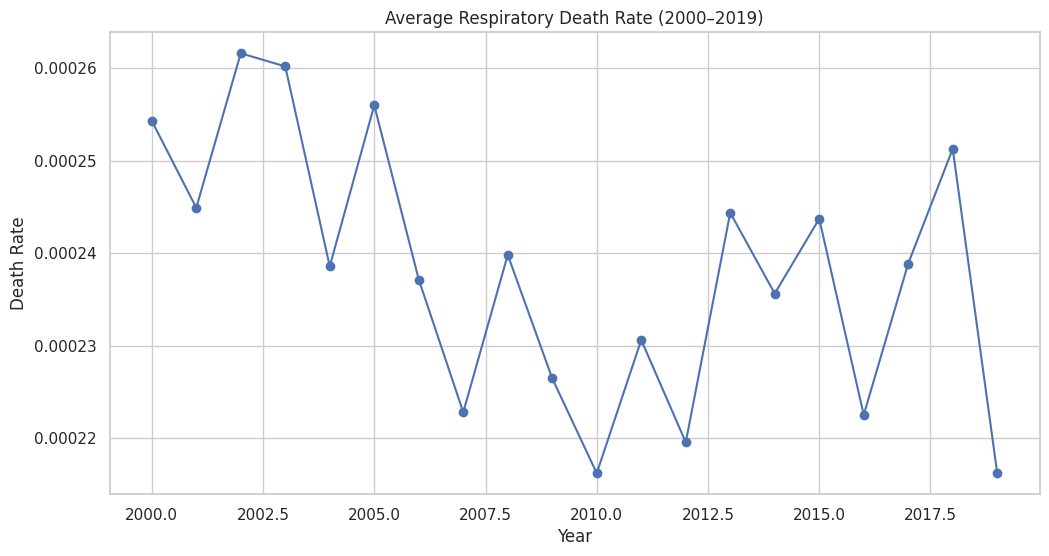

In [8]:
avg_resp_death_by_year = df.groupby('year')['resp_death_rate'].mean()

plt.figure(figsize=(12,6))
avg_resp_death_by_year.plot(marker='o')
plt.title("Average Respiratory Death Rate (2000–2019)")
plt.ylabel("Death Rate")
plt.xlabel("Year")
plt.grid(True)
plt.show()

**Step:-6 Trend of Max AQI Over Years**

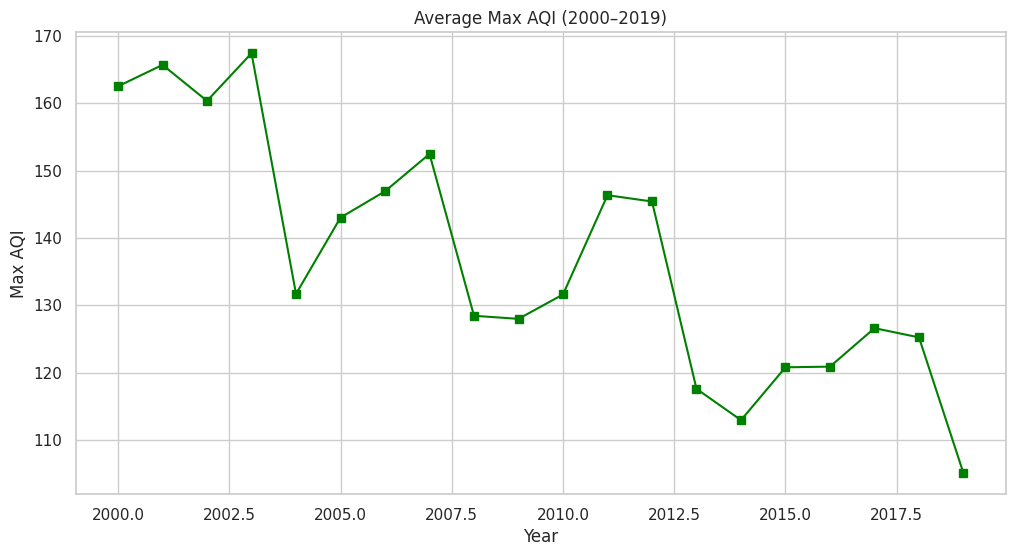

In [9]:
avg_max_aqi_by_year = df.groupby('year')['max_aqi'].mean()

plt.figure(figsize=(12,6))
avg_max_aqi_by_year.plot(color='green', marker='s')
plt.title("Average Max AQI (2000–2019)")
plt.ylabel("Max AQI")
plt.xlabel("Year")
plt.grid(True)
plt.show()

**Step:-7 Correlation Heatmap**

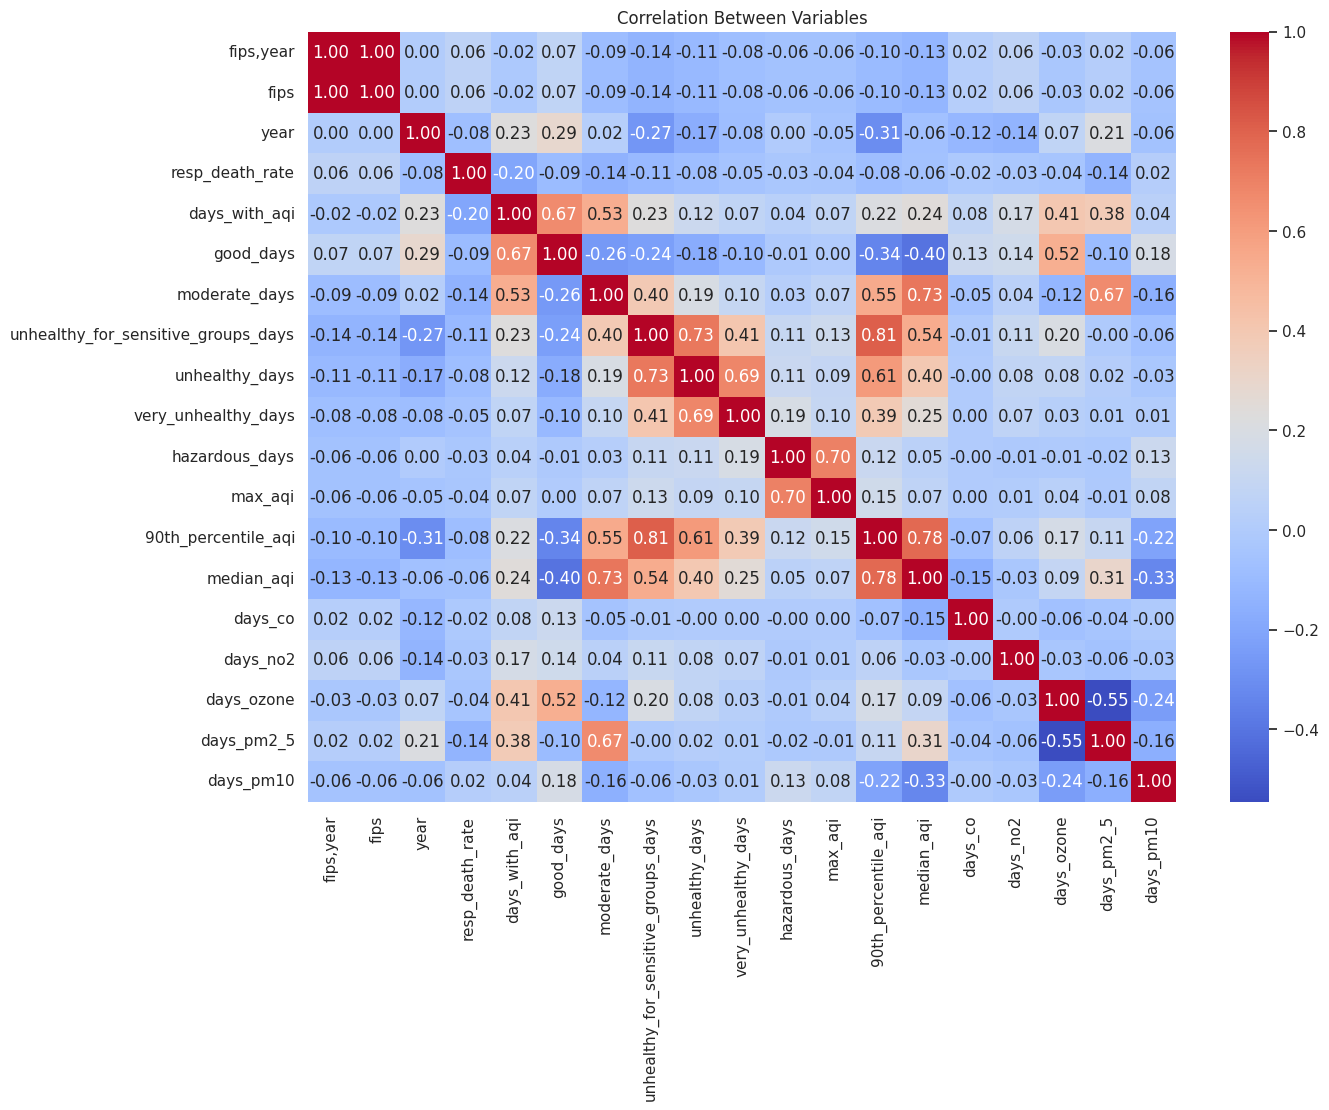

In [17]:
plt.figure(figsize=(14,10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Variables")
plt.show()


**Step:-8 Scatter Plot: AQI vs Respiratory Death Rate**

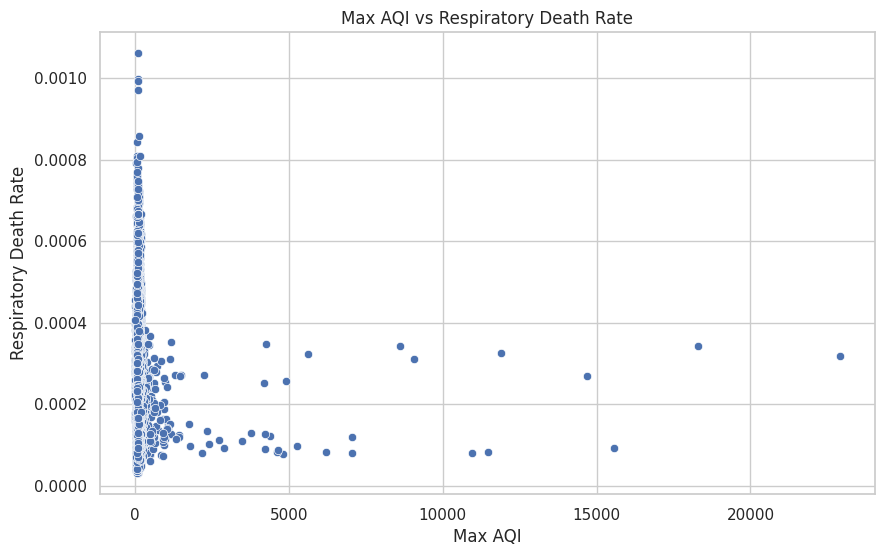

In [18]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='max_aqi', y='resp_death_rate', data=df)
plt.title("Max AQI vs Respiratory Death Rate")
plt.xlabel("Max AQI")
plt.ylabel("Respiratory Death Rate")
plt.show()

**Step:-9 Top 10 Counties with Highest Death Rates**

<ipython-input-45-4ae60e1aef21>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='resp_death_rate', y='fips', data=top10_deaths, palette='Reds_r')


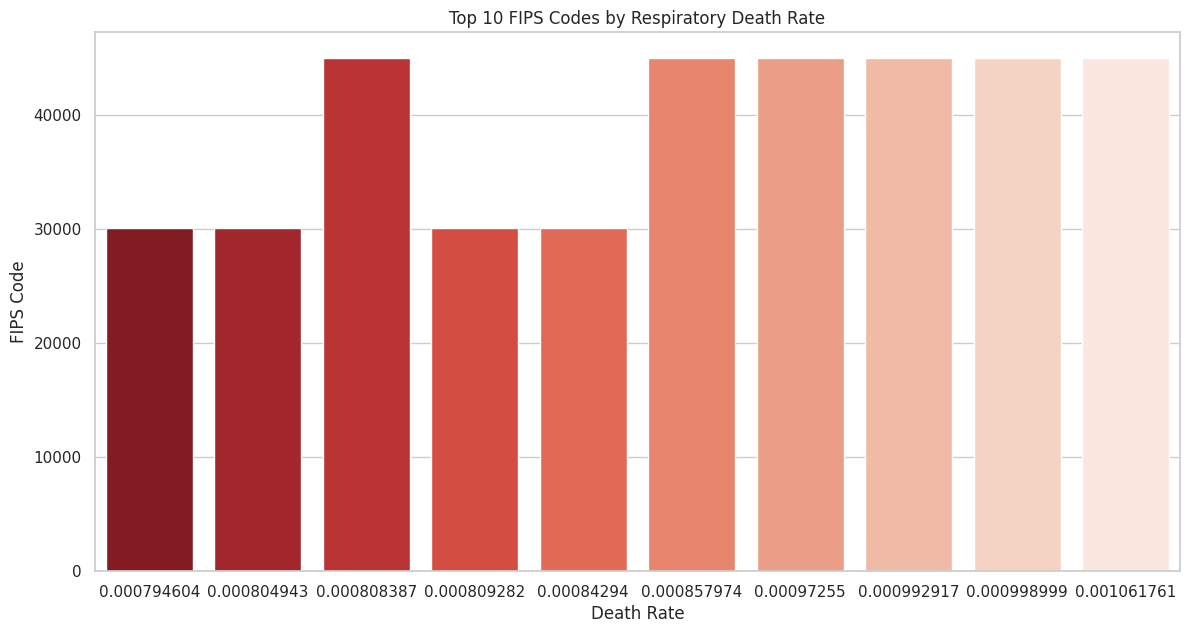

In [45]:
top10_deaths = df.sort_values(by='resp_death_rate', ascending=False).head(10)

plt.figure(figsize=(14, 7))
sns.barplot(x='resp_death_rate', y='fips', data=top10_deaths, palette='Reds_r')
plt.title("Top 10 FIPS Codes by Respiratory Death Rate")
plt.xlabel("Death Rate")
plt.ylabel("FIPS Code")
plt.show()

**Step:-10 Final insights**

In [46]:
# There is a moderate positive correlation between Max AQI and Respiratory Death Rate.
# Overall AQI has decreased slightly since 2000, but health impacts persist.
# Certain counties consistently show high respiratory death rates and bad air quality.